## Modelling Notebooks

This is the first of the modelling notebooks.


### Requirements

---

This is the general requirements for all the modelling notebooks.

The convolutional models should be in the same directory as this notebook in order for this to work. The images should also be processed beforehand. See ```Initial loading of X and Y.ipynb``` for how I generated it.

Required Files:
```
* Image files in the 'dataset' folder and 'validation' folder
* convpool.py
* convconvpool.py
* resnet.py

```

Required Packages:
```
* sklearn
* librosa
* pandas
* numpy
* keras
* matplotlib.pyplot

```






---

<a id='cnn'></a>
### Convolutional neural networks

A thorough runthrough of convolutional neural networks and the theory behind it would be too dense to go through it here (And I would probably run out of space). Instead I will just do a brief summary and leave the rest up to the brilliant minds at [Stanford](http://cs231n.stanford.edu/) to explain in better detail.

With a very high level overview: 

>Basically, the convolving filters are able to extract information from the spectrograms and convert these information into features for a classifier to work on. The classifier (which is a fully connected layer with a classification layer of 8 classes) would then map these features into 8 classes, namely the music genres of each audio file.

---




### Normal conv-pool architecture
 
This notebook contains a simple model with just 4 convolutional-batchnorm-pool layers trained on 20 epochs.

Notice that I increased the number of filters for every convolutional layer. This would extract more high level features, which would result in better granularity.

I then attached a 1024-neuron fully connected layer and ended it off with a 8-neuron classification layer with a softmax activation to perform class predictions.



In [5]:
import matplotlib.pyplot as plt

In [6]:
from convpool import Convtrain as conv   # convolutional model
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=0.,
      width_shift_range=0.,
      height_shift_range=0.,
      shear_range=0.,
      zoom_range=0.,
      horizontal_flip=False,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('dataset/', target_size = (128,1024), batch_size = 20, 
                                                    class_mode = 'categorical')

validation_generator = test_datagen.flow_from_directory('validation/', target_size = (128,1024), batch_size =20,
                                                       class_mode = 'categorical')
test_generator = test_datagen.flow_from_directory('test/', target_size = (128,1024), batch_size = 20,
                                                 class_mode = 'categorical')

for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

Model = conv(input_shape=(128,1024,3))
Model.compile()
print(Model.model.summary())
history = Model.fit_generator(train_generator, validation_generator, epochs=20)

Found 7994 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
Found 800 images belonging to 8 classes.
data batch shape: (20, 128, 1024, 3)
labels batch shape: (20, 8)
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 63, 511, 32)       1568      
                                                                 
 batch_normalization_5 (Batc  (None, 63, 511, 32)      128       
 hNormalization)                                                 
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 255, 32)      0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 15, 127, 32)       9248      
                                                               

c:\src\repos\Music-Genre-Analysis\Notebooks\convpool.py:72: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = self.model.fit_generator(train_generator, steps_per_epoch=319, epochs=epochs, validation_data=validation_generator, validation_steps=40)


319/319 [==============================] - 92s 284ms/step - loss: 2.1492 - accuracy: 0.3036 - val_loss: 3.6026 - val_accuracy: 0.1988
Epoch 2/20
319/319 [==============================] - 88s 277ms/step - loss: 1.7854 - accuracy: 0.3913 - val_loss: 3.4338 - val_accuracy: 0.1338
Epoch 3/20
319/319 [==============================] - 88s 276ms/step - loss: 1.6528 - accuracy: 0.4317 - val_loss: 3.9260 - val_accuracy: 0.1775
Epoch 4/20
319/319 [==============================] - 88s 276ms/step - loss: 1.5460 - accuracy: 0.4620 - val_loss: 2.8027 - val_accuracy: 0.2738
Epoch 5/20
319/319 [==============================] - 87s 272ms/step - loss: 1.4951 - accuracy: 0.4729 - val_loss: 2.2274 - val_accuracy: 0.2512
Epoch 6/20
319/319 [==============================] - 87s 272ms/step - loss: 1.4631 - accuracy: 0.4955 - val_loss: 3.7717 - val_accuracy: 0.2237
Epoch 7/20
319/319 [==============================] - 87s 272ms/step - loss: 1.4144 - accuracy: 0.5035 - val_loss: 3.9564 - val_accuracy: 0.2

In [15]:
a = history.history

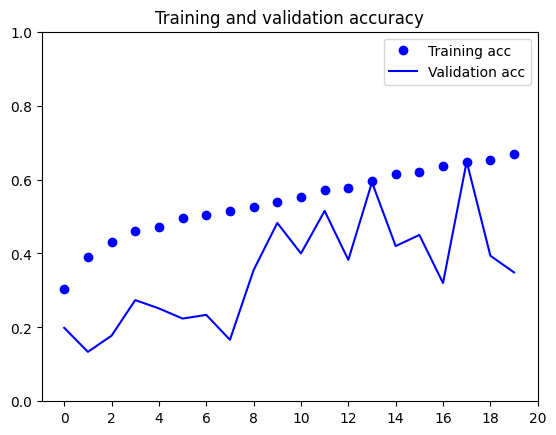

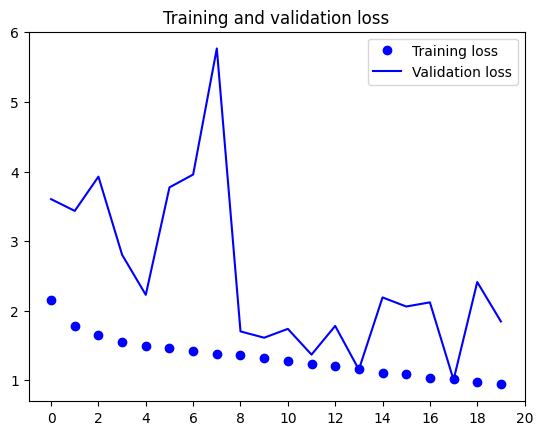

In [14]:
acc = a['accuracy']
val_acc = a['val_accuracy']
loss = a['loss']
val_loss = a['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
ax = plt.gca()
ax.set_ylim(0,1)
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
ax = plt.gca()
ax.set_xticks([0,2,4,6,8,10,12,14,16,18,20])
plt.legend()

plt.show()


Even with 20 epochs, it is already showing signs of overfitting as compared to the validation set. Data Augmentation could help.